In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

In [3]:
data1 = pd.read_csv('witcher_network.csv')


In [4]:
graph = nx.from_pandas_edgelist(data1, 'Source', 'Target') 
diameter = nx.diameter(graph)
center = nx.center(graph)






NetworkXError: Found infinite path length because the graph is not connected

In [5]:
diameter

NameError: name 'diameter' is not defined

In [6]:
center

NameError: name 'center' is not defined

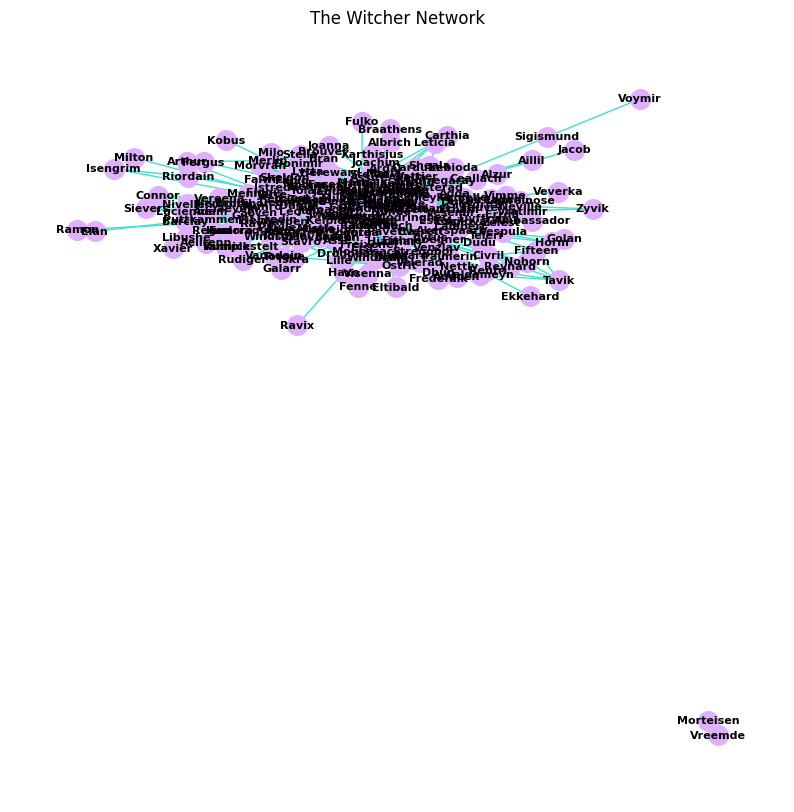

In [7]:
pos = nx.spring_layout(graph)
plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, with_labels=True, node_size=200, node_color='#E0B0FF', font_size=8, font_weight='bold', edge_color='#40E0D0')
plt.title("The Witcher Network")
plt.axis('off')
plt.show()


If we look above Morteisen and Vreemde aree not connected to our overall graph thus if we erase them from our process we could have that done

In [8]:
data = pd.read_csv('witcher_network.csv')
# Delete entries of 'Vreemde' and 'Morteisen' from 'Source' column
data = data[data['Source'] != 'Vreemde']
data = data[data['Source'] != 'Morteisen']

# Delete entries of 'Vreemde' and 'Morteisen' from 'Target' column
data = data[data['Target'] != 'Vreemde']
data = data[data['Target'] != 'Morteisen']

In [25]:
graph = nx.from_pandas_edgelist(data, 'Source', 'Target') 
diameter = nx.diameter(graph)
center = nx.center(graph)
radius= nx.radius(graph)


In [11]:
diameter

5

In [12]:
center

['Geralt',
 'Foltest',
 'Yennefer',
 'Baron',
 'Pavetta',
 'Crach',
 'Aen',
 'King',
 'Triss',
 'Vesemir',
 'Dandelion',
 'Gar',
 'Ciri',
 'Rience',
 'Ori',
 'Shani',
 'Philippa',
 'Emhyr',
 'Ithlinne',
 'Vilgefortz',
 'Artaud',
 'Tissaia',
 'Lydia',
 'Blue',
 'Codringher',
 'Sabrina',
 'Margarita',
 'Falka',
 'Esterad',
 'Francesca',
 'Marti',
 'Dorregaray',
 'Keira',
 'Zoltan',
 'Fringilla']

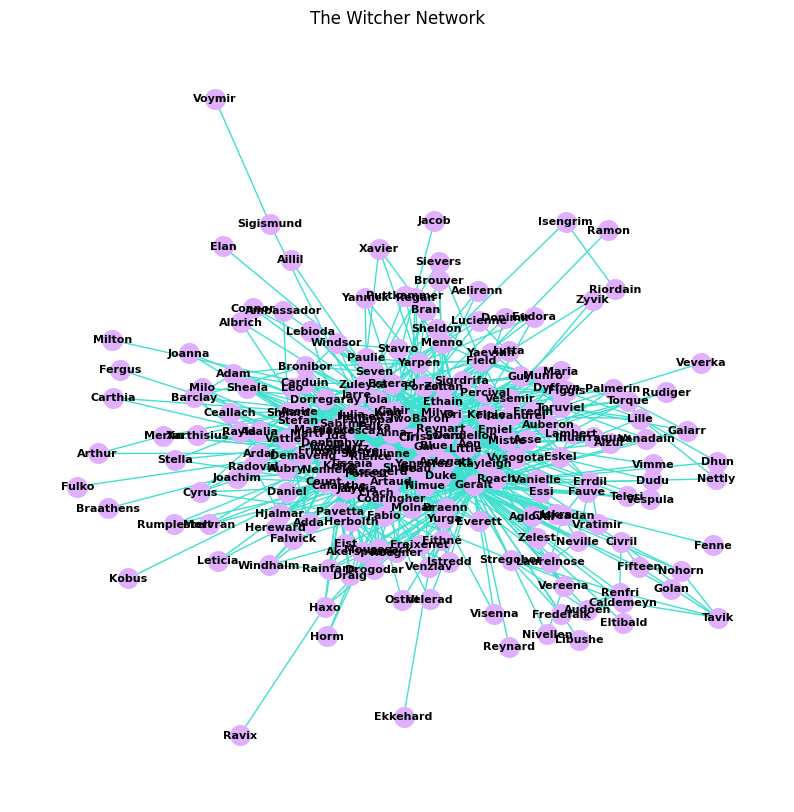

In [13]:
pos = nx.spring_layout(graph)
plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, with_labels=True, node_size=200, node_color='#E0B0FF', font_size=8, font_weight='bold', edge_color='#40E0D0')
plt.title("The Witcher Network")
plt.axis('off')
plt.show()

In [17]:
#Frequencies of the Source columsn to see the ones initiating dialogue
source_counts=data['Source'].value_counts().head(10)
source_counts

Geralt        202
Ciri          158
Yennefer      109
Dandelion      95
Emhyr          70
Philippa       66
Triss          55
King           55
Vilgefortz     50
Calanthe       47
Name: Source, dtype: int64

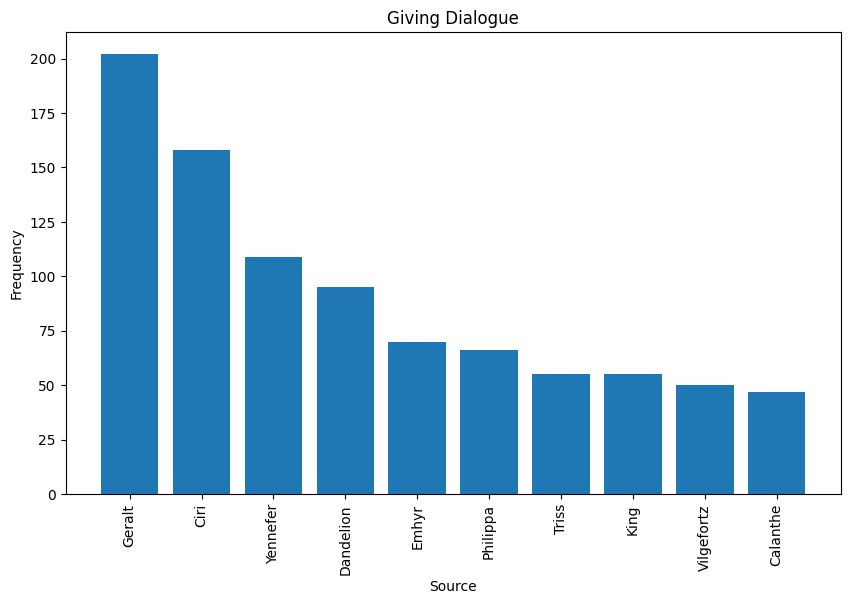

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(source_counts.index, source_counts.values)
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.title('Giving Dialogue')
plt.xticks(rotation=90)
plt.show()

In [19]:
#Frequencies of Targets receiving Dialogue
target_counts=data['Target'].value_counts().head(10)
target_counts

Geralt        202
Ciri          173
Yennefer       99
Dandelion      93
Emhyr          80
Philippa       59
Triss          53
Vilgefortz     52
Calanthe       51
King           48
Name: Target, dtype: int64

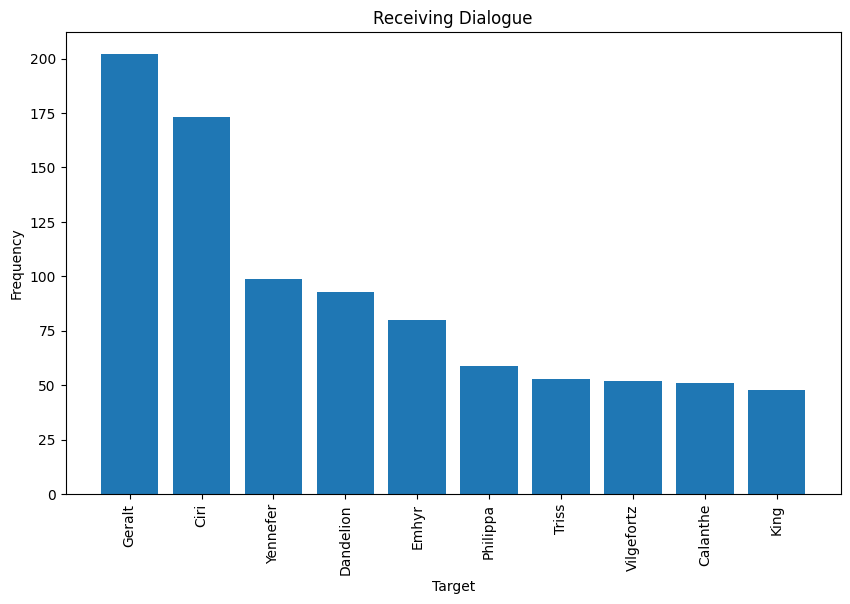

In [21]:
# Create bar chart for 'Target' column
plt.figure(figsize=(10, 6))
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Receiving Dialogue')
plt.xticks(rotation=90)
plt.show()

While the above measure frequency it doesnt necesarrily ensure us that our individual is also well connected

In [33]:
#This gives uis the degree to which the top 10 characters are connected
deg = pd.DataFrame(list(nx.degree(graph)), columns=['Name', 'Degree'])
deg.sort_values('Degree', inplace=True, ascending=False)
deg.head(10)

,Name,Degree
1,Geralt,137
85,Ciri,102
6,Yennefer,72
71,Dandelion,69
109,Emhyr,62
61,Triss,45
106,Philippa,45
111,Vilgefortz,44
56,King,43
31,Calanthe,39


What I will try to utilize as the category is to check the difference between degree, closeness centrality, betweeness centrality and eigenvector centrality from the first half of the books(1-4) and second (5-7)

In [36]:
set1 = data[data['book'].isin([1, 2, 3, 4])]
set2 = data[data['book'].isin([5,6,7])]

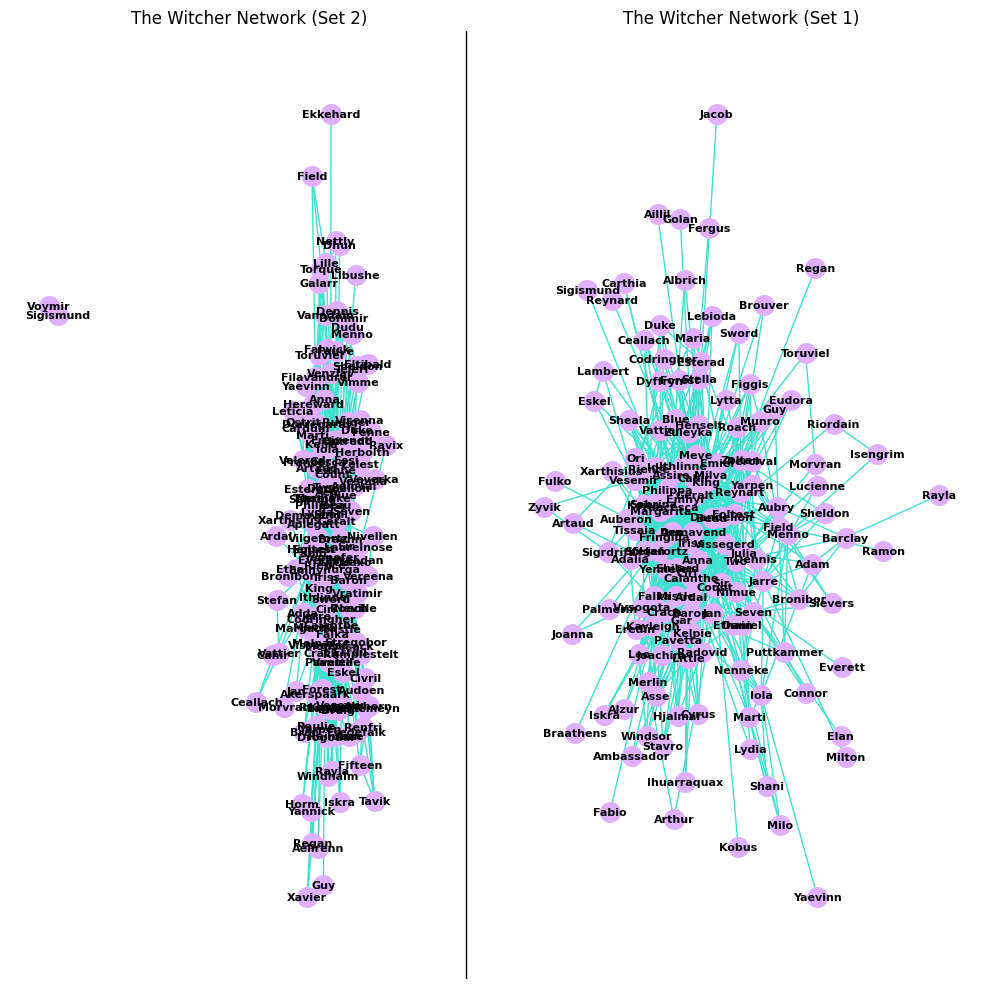

In [60]:

# Create the first network plot
graph1 = nx.from_pandas_edgelist(set1, 'Source', 'Target')
pos1 = nx.spring_layout(graph1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
nx.draw_networkx(graph1, pos1, with_labels=True, node_size=200, node_color='#E0B0FF', font_size=8, font_weight='bold', edge_color='#40E0D0')
plt.title("The Witcher Network (Set 2)")
plt.axis('off')

# Add vertical line to separate the plots
plt.axvline(x=0.5, color='black', linewidth=1.0)

# Create the second network plot
graph2 = nx.from_pandas_edgelist(set2, 'Source', 'Target')
pos2 = nx.spring_layout(graph2)
plt.subplot(1, 2, 2)
nx.draw_networkx(graph2, pos2, with_labels=True, node_size=200, node_color='#E0B0FF', font_size=8, font_weight='bold', edge_color='#40E0D0')
plt.title("The Witcher Network (Set 1)")
plt.axis('off')



plt.tight_layout()
plt.show()


In [97]:
# Calculate degree centrality for graph1
degree_graph1 = dict(nx.degree(graph1))
deg_graph1 = pd.DataFrame(list(degree_graph1.items()), columns=['Name', 'Degree 1st set'])

# Calculate degree centrality for graph2
degree_graph2 = dict(nx.degree(graph2))
deg_graph2 = pd.DataFrame(list(degree_graph2.items()), columns=['Name', 'Degree 2nd set'])

# Merge the dataframes based on the 'Name' column
deg = pd.merge(deg_graph1, deg_graph2, on='Name', how='outer')

# Sort the dataframe by degree graph1 in descending order
deg.sort_values('Degree 1st set', inplace=True, ascending=False)

# Print the top 10 characters based on degree centrality for both graphs
print(deg.head(10))


           Name  Degree 1st set  Degree 2nd set
1        Geralt           107.0            65.0
85         Ciri            69.0            67.0
6      Yennefer            48.0            42.0
71    Dandelion            40.0            44.0
109       Emhyr            38.0            47.0
31     Calanthe            27.0            22.0
2       Foltest            25.0            17.0
106    Philippa            24.0            33.0
61        Triss            24.0            32.0
111  Vilgefortz            24.0            33.0


In [95]:
deg_graph1.sort_values('Degree 1st set', inplace=True, ascending=False)
deg_graph1.head(10)

,Name,Degree 1st set
1,Geralt,107
85,Ciri,69
6,Yennefer,48
71,Dandelion,40
109,Emhyr,38
31,Calanthe,27
2,Foltest,25
106,Philippa,24
61,Triss,24
111,Vilgefortz,24


In [98]:
deg_graph2.sort_values('Degree 2nd set', inplace=True, ascending=False)
deg_graph2.head(10)

,Name,Degree 2nd set
31,Ciri,67
4,Geralt,65
10,Emhyr,47
28,Dandelion,44
8,Yennefer,42
22,King,35
49,Vilgefortz,33
0,Milva,33
6,Philippa,33
7,Triss,32


## Closeness and Betweeness

In [72]:
# Calculate closeness centrality for graph1
closeness_graph1 = nx.closeness_centrality(graph1)
closeness_graph1 = pd.DataFrame(list(closeness_graph1.items()), columns=['Name', 'Closeness graph1'])

# Calculate closeness centrality for graph2
closeness_graph2 = nx.closeness_centrality(graph2)
closeness_graph2 = pd.DataFrame(list(closeness_graph2.items()), columns=['Name', 'Closeness graph2'])

# Calculate betweenness centrality for graph1
betweenness_graph1 = nx.betweenness_centrality(graph1)
betweenness_graph1 = pd.DataFrame(list(betweenness_graph1.items()), columns=['Name', 'Betweenness graph1'])

# Calculate betweenness centrality for graph2
betweenness_graph2 = nx.betweenness_centrality(graph2)
betweenness_graph2 = pd.DataFrame(list(betweenness_graph2.items()), columns=['Name', 'Betweenness graph2'])




In [79]:
closeness_graph1.sort_values('Closeness graph1', inplace=True, ascending=False)
closeness_graph1.head(10)

,Name,Closeness graph1
1,Geralt,0.757707
85,Ciri,0.625108
6,Yennefer,0.577023
109,Emhyr,0.555652
71,Dandelion,0.551566
31,Calanthe,0.530127
111,Vilgefortz,0.524566
106,Philippa,0.520924
2,Foltest,0.520924
92,Rience,0.515553


In [80]:
closeness_graph2.sort_values('Closeness graph2', inplace=True, ascending=False)
closeness_graph2.head(10)

,Name,Closeness graph2
31,Ciri,0.637555
4,Geralt,0.623932
28,Dandelion,0.570312
10,Emhyr,0.561538
8,Yennefer,0.546816
37,Cahir,0.536765
22,King,0.530909
7,Triss,0.528986
0,Milva,0.528986
32,Zoltan,0.527076


In [81]:
betweenness_graph1.sort_values('Betweenness graph1', inplace=True, ascending=False)
betweenness_graph1.head(10)

,Name,Betweenness graph1
1,Geralt,0.504315
85,Ciri,0.178107
109,Emhyr,0.103305
6,Yennefer,0.066545
71,Dandelion,0.064013
31,Calanthe,0.027042
2,Foltest,0.019544
51,Aen,0.015959
111,Vilgefortz,0.015394
97,Yarpen,0.014856


In [82]:
betweenness_graph2.sort_values('Betweenness graph2', inplace=True, ascending=False)
betweenness_graph2.head(10)

,Name,Betweenness graph2
31,Ciri,0.178761
4,Geralt,0.173184
10,Emhyr,0.078520
28,Dandelion,0.067582
8,Yennefer,0.064620
32,Zoltan,0.053410
41,Count,0.052029
22,King,0.050303
23,Two,0.044866
0,Milva,0.041907


## Eigenvector Centrality
The importance of a node

In [88]:
# Calculate eigenvector centrality for graph1
eigen_graph1 = nx.eigenvector_centrality_numpy(graph1)
eigen_graph1 = pd.DataFrame(list(eigen_graph1.items()), columns=['Name', 'Eigenvector graph1'])

# Calculate eigenvector centrality for graph2
eigen_graph2 = nx.eigenvector_centrality_numpy(graph2)
eigen_graph2 = pd.DataFrame(list(eigen_graph2.items()), columns=['Name', 'Eigenvector graph2'])


           Name  Eigenvector graph1
1        Geralt            0.383380
85         Ciri            0.306378
6      Yennefer            0.249742
109       Emhyr            0.206066
71    Dandelion            0.202082
106    Philippa            0.176720
111  Vilgefortz            0.167090
92       Rience            0.165270
31     Calanthe            0.163265
61        Triss            0.155864


In [89]:
eigen_graph1.sort_values('Eigenvector graph1', inplace=True, ascending=False)
eigen_graph1.head(10)

,Name,Eigenvector graph1
1,Geralt,0.383380
85,Ciri,0.306378
6,Yennefer,0.249742
109,Emhyr,0.206066
71,Dandelion,0.202082
106,Philippa,0.176720
111,Vilgefortz,0.167090
92,Rience,0.165270
31,Calanthe,0.163265
61,Triss,0.155864


In [90]:
eigen_graph2.sort_values('Eigenvector graph2', inplace=True, ascending=False)
eigen_graph2.head(10)

,Name,Eigenvector graph2
31,Ciri,0.291720
4,Geralt,0.272069
10,Emhyr,0.228989
8,Yennefer,0.216729
28,Dandelion,0.212634
7,Triss,0.189483
6,Philippa,0.176454
37,Cahir,0.174385
53,Fringilla,0.171865
22,King,0.170738


In [93]:
# Extract the degree centrality values for graph1 and graph2
deg_graph1_values = deg_graph1['Degree 1st set']
deg_graph2_values = deg_graph2['Degree 2nd Set']
# Perform the t-test
t_stat, p_value = stats.ttest_ind(deg_graph1_values, deg_graph2_values)
# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")



t-statistic: -1.5348029710381723
p-value: 0.12588615292511582


In [103]:
# Extract the closeness centrality values for graph1 and graph2
close_graph1_values = closeness_graph1['Closeness graph1']
close_graph2_values = closeness_graph2['Closeness graph2']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(close_graph1_values, close_graph2_values)

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 1.800613771540278
p-value: 0.0727680804273575


In [104]:
# Extract the betweeness centrality values for graph1 and graph2
bet_graph1_values = betweenness_graph1['Betweenness graph1']
bet_graph2_values = betweenness_graph2['Betweenness graph2']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(bet_graph1_values, bet_graph2_values)

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -0.4246450929739622
p-value: 0.6713997973032266


In [91]:
# Extract the eigenvector centrality values for graph1 and graph2
eigen_graph1_values = eigen_graph1['Eigenvector graph1']
eigen_graph2_values = eigen_graph2['Eigenvector graph2']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(eigen_graph1_values, eigen_graph2_values)

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -0.18332424780095455
p-value: 0.8546674468342581


# Results
There is statisitical significance in the means of the centrality measures between the first 4 books and the last 3.